We'll start simple, with a single fully-connected neural layer as encoder and as decoder:

In [1]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

Let's also create a separate encoder model:

In [2]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

As well as the decoder model:

In [3]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

Now let's train our autoencoder to reconstruct MNIST digits.

First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer:

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Now let's train our autoencoder for 50 epochs:

In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.2777 - val_loss: 0.1945
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1741 - val_loss: 0.1554
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1454 - val_loss: 0.1343
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1289 - val_loss: 0.1216
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1183 - val_loss: 0.1129
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1110 - val_loss: 0.1070
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1060 - val_loss: 0.1029
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1024 - val_loss: 0.0997
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0998 - val_loss: 0.0975
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0979 - val_lo

After 50 epochs, the autoencoder seems to reach a stable train/validation loss value of about 0.09. We can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib.

In [8]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


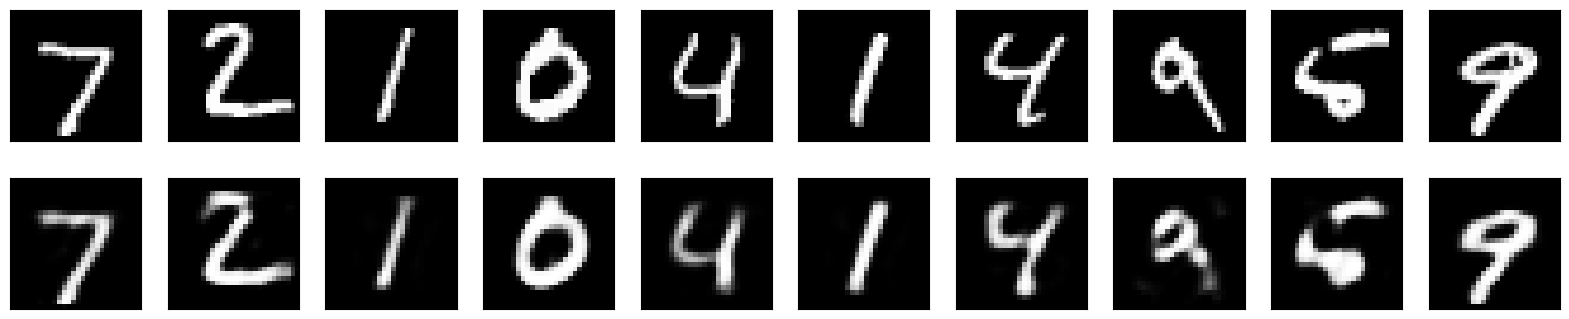

In [9]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Deep autoencoder

In [10]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [11]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [12]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [13]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 7s 19ms/step - loss: 0.2469 - val_loss: 0.1652
Epoch 2/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1500 - val_loss: 0.1357
Epoch 3/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1292 - val_loss: 0.1210
Epoch 4/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1189 - val_loss: 0.1142
Epoch 5/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1134 - val_loss: 0.1103
Epoch 6/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1099 - val_loss: 0.1067
Epoch 7/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1069 - val_loss: 0.1046
Epoch 8/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1047 - val_loss: 0.1033
Epoch 9/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1029 - val_loss: 0.1007
Epoch 10/100
235/235 [==============================] - 4s 18ms/step - loss: 0.101

In [14]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


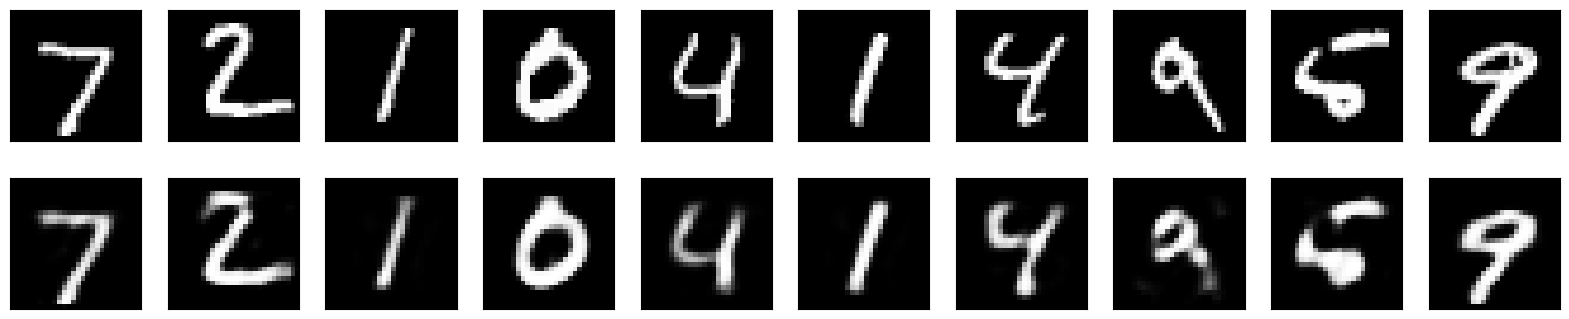

In [15]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Application to image denoising

Let's put our convolutional autoencoder to work on an image denoising problem. It's simple: we will train the autoencoder to map noisy digits images to clean digits images.

Here's how we will generate synthetic noisy digits: we just apply a gaussian noise matrix and clip the images between 0 and 1.

In [16]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

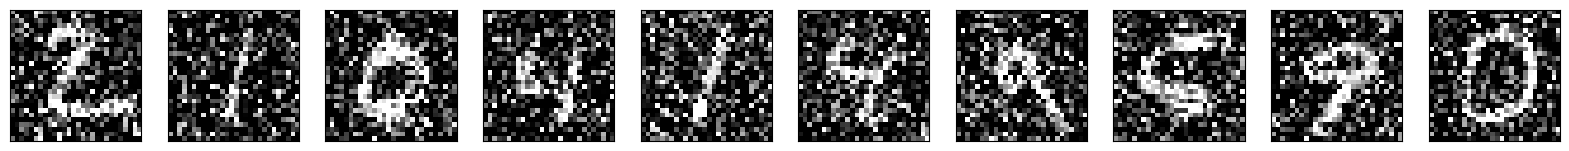

In [17]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [18]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [21]:
from tensorflow.keras.callbacks import TensorBoard

history = autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 149s 316ms/step - loss: 0.0930 - val_loss: 0.0931
Epoch 2/100
469/469 [==============================] - 154s 328ms/step - loss: 0.0930 - val_loss: 0.0932
Epoch 3/100
469/469 [==============================] - 157s 334ms/step - loss: 0.0930 - val_loss: 0.0930
Epoch 4/100
469/469 [==============================] - 156s 332ms/step - loss: 0.0930 - val_loss: 0.0932
Epoch 5/100
469/469 [==============================] - 156s 334ms/step - loss: 0.0930 - val_loss: 0.0929
Epoch 6/100
469/469 [==============================] - 151s 321ms/step - loss: 0.0930 - val_loss: 0.0930
Epoch 7/100
469/469 [==============================] - 154s 328ms/step - loss: 0.0929 - val_loss: 0.0932
Epoch 8/100
469/469 [==============================] - 156s 332ms/step - loss: 0.0930 - val_loss: 0.0930
Epoch 9/100
469/469 [==============================] - 157s 335ms/step - loss: 0.0929 - val_loss: 0.0930
Epoch 10/100
469/469 [==============================] -

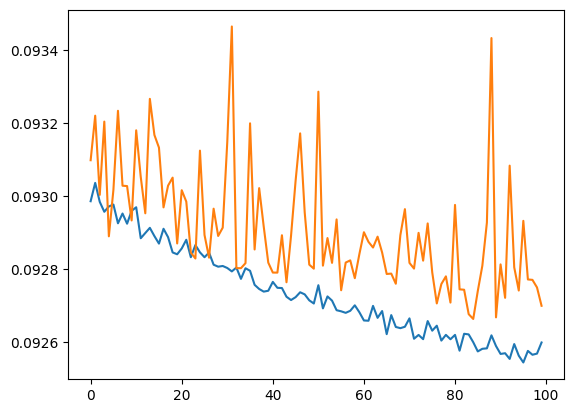

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])